# Exercise 5

This exercise is all about imaging. We start with Histogram Equalization and go over to tresholding and filtering.

In [3]:
%pylab inline
import scipy.misc
import scipy.ndimage
import skimage.util
import matplotlib.cm as cm

Populating the interactive namespace from numpy and matplotlib


## Histogram Equalization
As we want to work with images, we need to import OpenCV.

In [4]:
import cv2

Load the lena image, convert it to grayscale and plot it.

In [5]:
# Method 1
lena = cv2.imread('lena.png',0)
# or Method 2
img = cv2.imread('lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

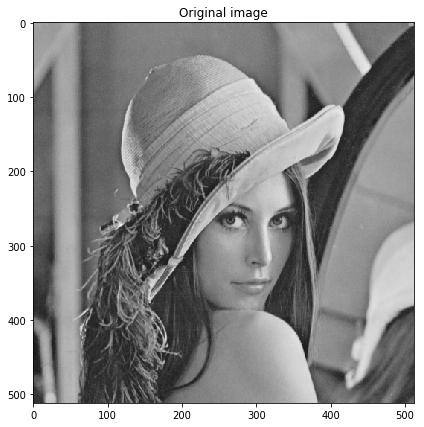

In [6]:
plt.figure(figsize(7,7))
plt.imshow(img, 'gray',vmin=0, vmax=255)
plt.title('Original image');

Now we want to plot the histogram of the gray image. Use the command: cv2.calcHist(). For plotting, use the 'stem' plot.

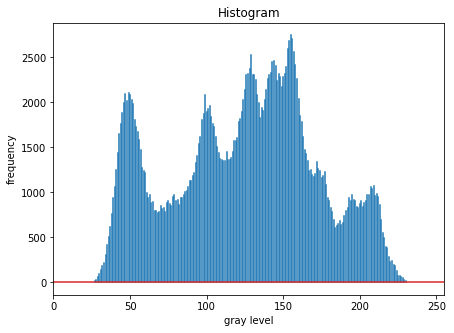

In [7]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
figure(figsize(7,5))
plt.stem(hist, markerfmt=' ')
plt.xlim([0,255])
plt.title('Histogram')
plt.xlabel('gray level')
plt.ylabel('frequency');

Another possibility is to use numpy where you can also calculate the cumulative histogram. (np.histogram, np.cumsum())

Plot the histogram and the cumulative histogram nex tto each other (subplot)

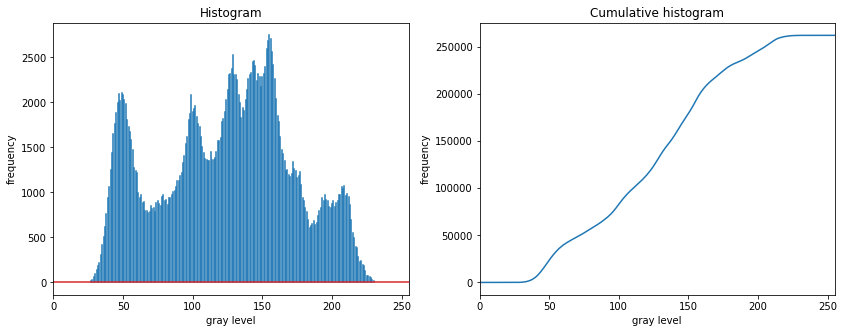

In [7]:
hist,bins = np.histogram(img, 256, [0,256])
cdf = hist.cumsum()

figure(figsize(14,5))
plt.subplot(1, 2, 1)
plt.stem(hist, markerfmt=' ')
plt.xlim([0, 255])
plt.title('Histogram')
plt.xlabel('gray level')
plt.ylabel('frequency')
plt.subplot(1, 2, 2)
plt.plot(cdf)
plt.xlim([0, 255])
plt.title('Cumulative histogram')
plt.xlabel('gray level')
plt.ylabel('frequency');

Now apply Histogram Equalization. (cv2.equalizeHist())

In [8]:
equalized = cv2.equalizeHist(img)

Plot the histogram and the cumulative histogram.

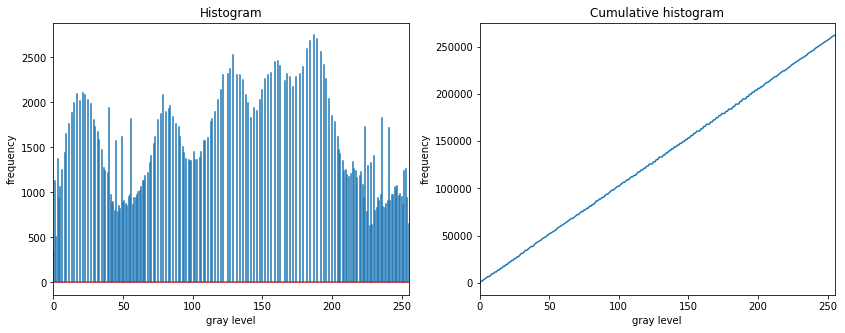

In [9]:
hist,bins = np.histogram(equalized.flatten(), 256, [0,256])
cdf = hist.cumsum()

figure(figsize(14,5))
plt.subplot(1, 2, 1)
plt.stem(hist, markerfmt=' ')
plt.xlim([0, 255])
plt.title('Histogram')
plt.xlabel('gray level')
plt.ylabel('frequency')
plt.subplot(1, 2, 2)
plt.plot(cdf)
plt.xlim([0, 255])
plt.title('Cumulative histogram')
plt.xlabel('gray level')
plt.ylabel('frequency');

And now plot the images again.

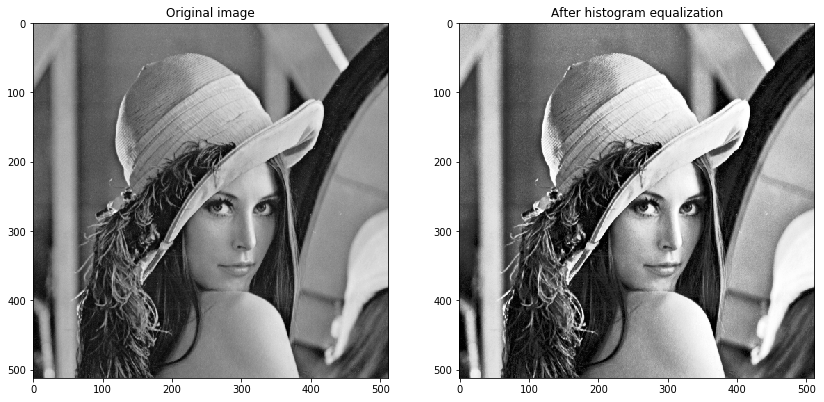

In [10]:
plt.figure(figsize(14,7))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.title('Original image');
plt.subplot(1, 2, 2), plt.imshow(equalized, 'gray')
plt.title('After histogram equalization');

Plot the difference image. (Original - Equalized)

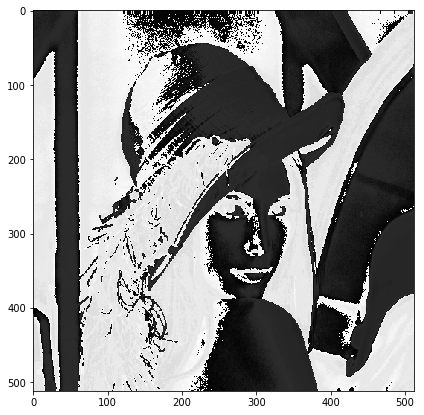

In [11]:
plt.imshow(equalized - img,'gray')

## Global thresholding

Load 'letters.jpg' as grayscale image to apply the different threshold functions on it.

In [12]:
img = cv2.imread('letters.jpg',0)

cv2.threshold() enables different types of thresholding. Plot the original image and the five functions.

(http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html)

In [13]:
ret, thresh_img1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh_img2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh_img3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh_img4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh_img5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

Plot all their histograms and take a look at it.

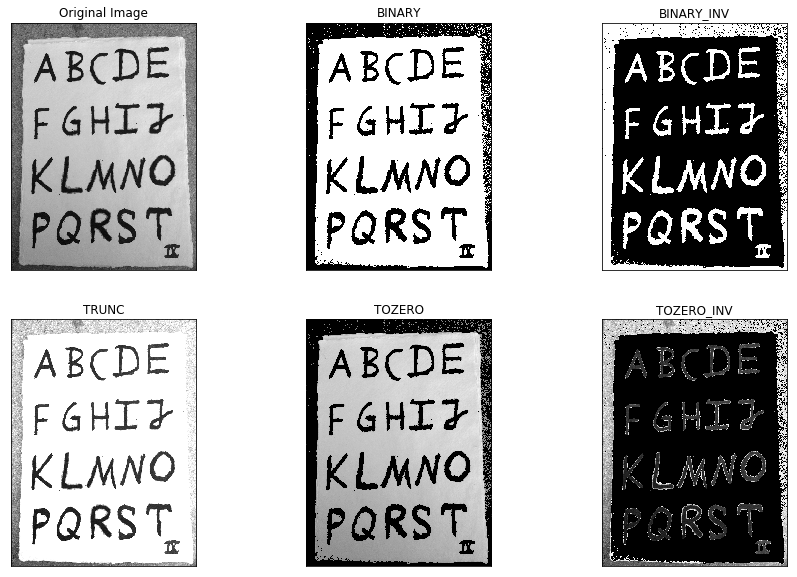

In [14]:
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_img1, thresh_img2, thresh_img3, thresh_img4, thresh_img5]

figure(figsize(15,10))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

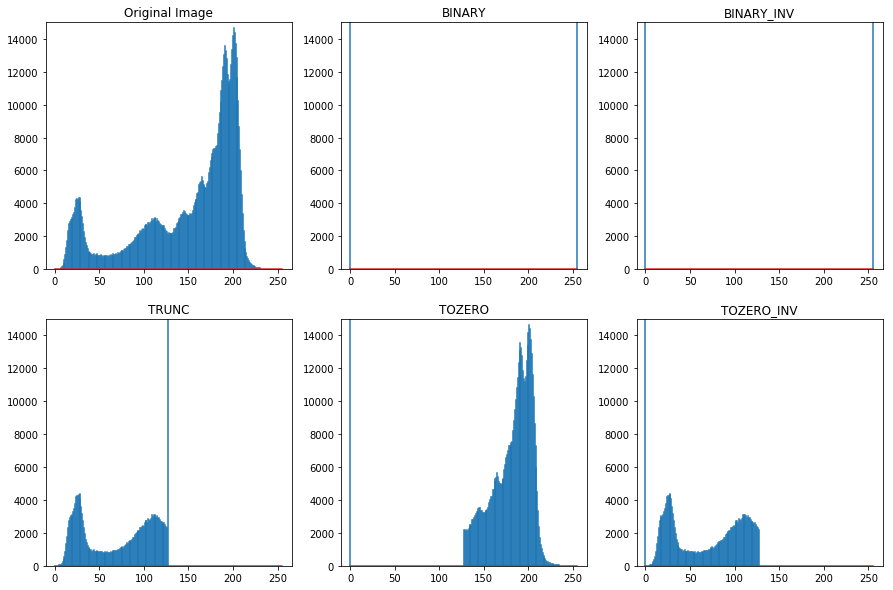

In [19]:
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_img1, thresh_img2, thresh_img3, thresh_img4, thresh_img5]

figure(figsize(15,10))
for i in range(6):
    hist,bins = np.histogram(images[i], 256, [0,256])
    plt.subplot(2, 3, i+1), plt.stem(hist,markerfmt=' ')
    plt.xlim([-10, 266])
    plt.ylim([0,15000])
    plt.title(titles[i])

## Adaptive tresholding

Load and plot the 'xray.jpg' (grayscale!) image. Apply the binary global thresholding and the two adaptive thresholding functions. (cv2.adaptiveThreshold())

In [15]:
img = cv2.imread('xray.jpg',0)

In [16]:
ret,th1 = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 33, 2)

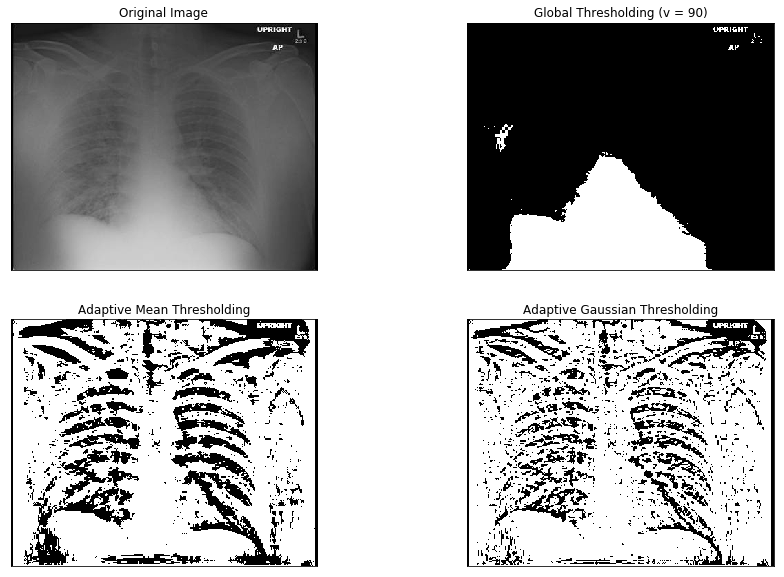

In [22]:
titles = ['Original Image', 'Global Thresholding (v = 90)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

figure(figsize(15,10))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

## Image filtering

Load the standard face image as grayvalue image[face = scipy.misc.face()]. Convert it from BGR to Gray (cv2.cvtColor()). Downscale it to half the size and plot it. 

grayscale image: 512px x 384px


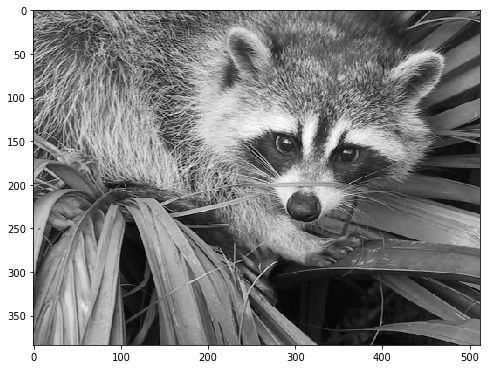

In [17]:
face = scipy.misc.face()
img = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
img = scipy.ndimage.zoom(img, .5) # one fourth in each dimension
height, width = img.shape
print("grayscale image: {1}px x {0}px".format(height, width))
figure(figsize(8,8))
plt.imshow(img, 'gray');

Add some 'salt and pepper' noise to it (skimage.util.random_noise()). 

In [18]:
noisy_img = skimage.util.random_noise(img, mode='s&p', amount=0.05)

Text(0.5,1,'Image with s&p noise')

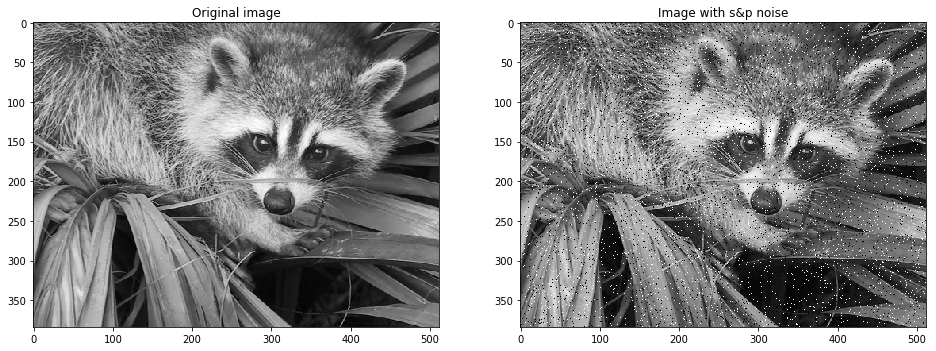

In [19]:
figure(figsize(16,8))
plt.subplot(1, 2, 1), plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 2, 2), plt.imshow(noisy_img, 'gray')
plt.title('Image with s&p noise')

### Simple Averaging Filter
Applying a simple n x n - kernel averaging. There are two possibilities to do that. Implement both (cv2.filter2D(), cv2.blur()).

Text(0.5,1,'Average filtered image 2')

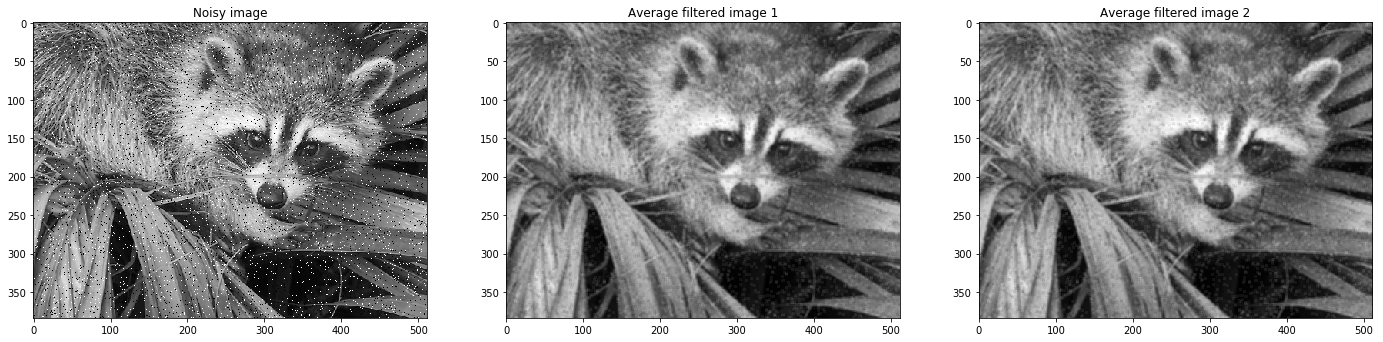

In [20]:
n = 4;
kernel = np.ones((n, n), np.float32)/np.square(n)

avg1 = cv2.filter2D(noisy_img, -1, kernel)

avg2 = cv2.blur(noisy_img, (n, n))

figure(figsize(24,8))
plt.subplot(1, 3, 1), plt.imshow(noisy_img, 'gray')
plt.title('Noisy image')
plt.subplot(1, 3, 2), plt.imshow(avg1, 'gray')
plt.title('Average filtered image 1')
plt.subplot(1, 3, 3), plt.imshow(avg2, 'gray')
plt.title('Average filtered image 2')

### Gaussian Filter

Appyling a Gaussian Filter to the image and plot it. There are also two possibilities. (cv2.filter2D(), cv2.GaussianBlur())

Text(0.5,1,'Gaussian filtered image 2')

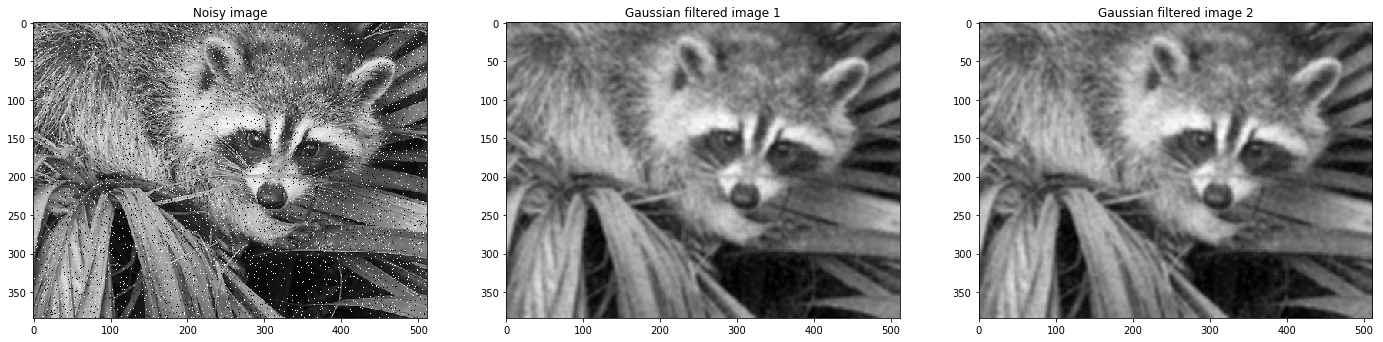

In [21]:
n = 7
sigma = 3
kernel = cv2.getGaussianKernel(n, sigma)

kernel = kernel * kernel.transpose()

gaussian1 = cv2.filter2D(noisy_img, -1, kernel)

gaussian2 = cv2.GaussianBlur(noisy_img, (n, n), sigma)

figure(figsize(24,8))
plt.subplot(1, 3, 1), plt.imshow(noisy_img, 'gray')
plt.title('Noisy image')
plt.subplot(1, 3, 2), plt.imshow(gaussian1, 'gray')
plt.title('Gaussian filtered image 1')
plt.subplot(1, 3, 3), plt.imshow(gaussian2, 'gray')
plt.title('Gaussian filtered image 2')

Plot the difference image between the two methods.

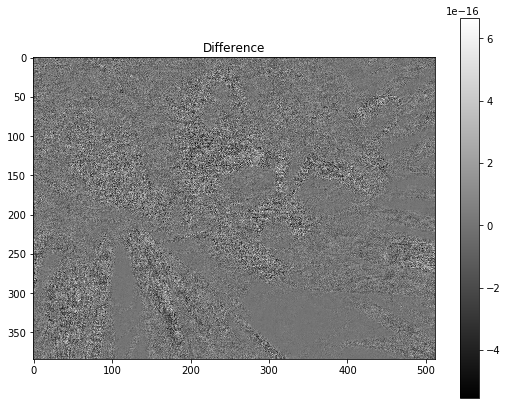

In [22]:
diff = gaussian2 - gaussian1

figure(figsize(9,7))
plt.imshow(diff, 'gray')
plt.title('Difference')
plt.colorbar();

### Median filter

Apply the Median filter by using cv2.medianBlur(). As this filter requires uint8 numbers, convert the image to this format and apply the filter afterwards.

In [23]:
n = 5
uintImage = np.uint8(noisy_img * 255)
median = cv2.medianBlur(uintImage, n)

Text(0.5,1,'Median filtered image')

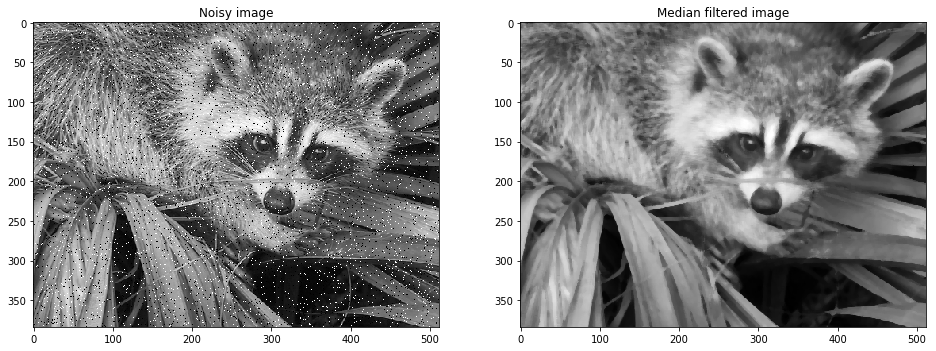

In [24]:
figure(figsize(16,8))
plt.subplot(1, 2, 1), plt.imshow(noisy_img, 'gray')
plt.title('Noisy image')
plt.subplot(1, 2, 2), plt.imshow(median, 'gray')
plt.title('Median filtered image')